# Introduzione

E' possibile visualizzare una versione interattiva online al seguente link: [https://datalore.jetbrains.com/view/notebook/GQXk2hvnZKIYoLvF0B9nsZ](https://datalore.jetbrains.com/view/notebook/GQXk2hvnZKIYoLvF0B9nsZ).

I dati unidimensionali esaminati sono quelli del peso corporeo nel periodo di due anni e mezzo di un uomo di età 24 attuali.  
I dati bidimensionali riguardano il peso corporeo della medesima persona nello stesso periodo e le calorie assunte giornalmente.

Il peso corporeo è stato registrato con due bilance differenti, una per il primo anno e un'altra nei restanti e quindi vi potrebbe essere una differenza di misura.  
I dati dei primi mesi sulle calorie assunte non sono molto precisi in quanto la quantità del cibo non veniva pesata, ma approssimata.

Allo stato dell'arte, importando i dati da Samsung Health, è possibile visualizzare le proprie statistiche. Questo potrebbe non funzionare in futuro se la forma dei dati venisse cambiata, ossia il parsing dei dati non funzionerebbe più. I commenti sui dati, tuttavia, risulteranno inefficienti in quanto i più significativi non sono dinamici, bensì basati su un campione di esso.

Poiché i dati sono molti riguardanti il peso corporeo, circa 500, e sulle calorie assunte, quasi 13000, ne verrà preso un campione calcolato nel seguente modo:
* Per il peso corporeo, il campione sarà il peso medio delle pesate in ogni settimana.  
  Quindi x_i = peso medio nella settimana i.
* Per le calorie assunte, il campione sarà la media delle calorie assunte in ogni settimana.  
  Quindi y_i = media delle calorie assunte nella settimana i.

**Nota:** Se nella settimana i non vi sono dati sul peso, essa verrà saltata e quindi anche le rispettive calorie assunte.

Si è deciso di usare la media campionaria e non la mediana perché i picchi di valore sono importanti da considerare.

# Installazione dipendenze

In [1]:
!pip install matplotlib
!pip install pandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
from math import sqrt

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

# Parsing dei dati del peso corporeo

È stato necessario arrotondare i valori del peso corporeo perché altrimenti si avrebbe avuto il numero di modalità del carattere quasi uguale all'ampiezza del dato.

In [3]:
with open('peso.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    peso = []
    reader.__next__()
    reader.__next__()
    for row in reader:
        peso.append([row[1], float(row[4])])

df_peso = pd.DataFrame(peso, columns=['data', 'peso'])
df_peso['data'] = pd.to_datetime(df_peso['data'])
df_peso = df_peso.groupby(pd.Grouper(key='data', freq='W')).mean().round(0)
df_peso = df_peso.dropna()
df_peso = df_peso.reset_index()
df_peso

,data,peso
0,2019-12-29,140.0
1,2020-01-12,140.0
2,2020-01-26,139.0
3,2020-02-02,139.0
4,2020-02-23,138.0
...,...,...
115,2022-06-05,103.0
116,2022-06-12,103.0
117,2022-06-19,102.0
118,2022-06-26,106.0


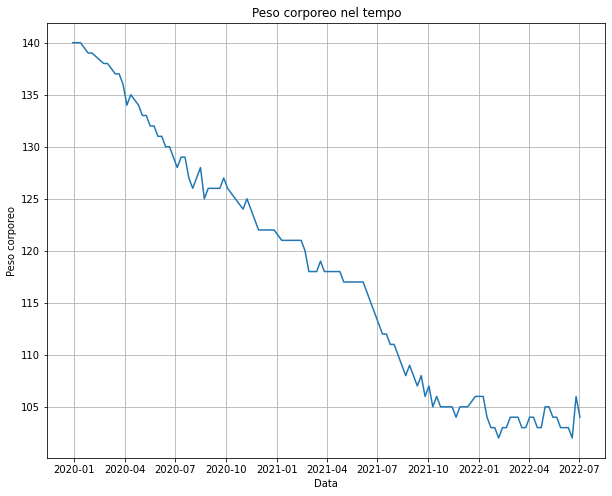

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df_peso['data'], df_peso['peso'])
ax.set_title('Peso corporeo nel tempo')
ax.set_xlabel('Data')
ax.set_ylabel('Peso corporeo')
ax.grid()
plt.show()

Sono state eliminate le settimane in cui non vi erano dati.

In [5]:
x = sorted(int(p) for p in df_peso['peso'])
n = len(x)
print(f'Ampiezza del dato: {n}')
for i, x_i in enumerate(x):
    print(f'x_({i + 1})={x_i}', end=' ')

Ampiezza del dato: 120
x_(1)=102 x_(2)=102 x_(3)=103 x_(4)=103 x_(5)=103 x_(6)=103 x_(7)=103 x_(8)=103 x_(9)=103 x_(10)=103 x_(11)=103 x_(12)=103 x_(13)=103 x_(14)=104 x_(15)=104 x_(16)=104 x_(17)=104 x_(18)=104 x_(19)=104 x_(20)=104 x_(21)=104 x_(22)=104 x_(23)=104 x_(24)=105 x_(25)=105 x_(26)=105 x_(27)=105 x_(28)=105 x_(29)=105 x_(30)=105 x_(31)=105 x_(32)=105 x_(33)=105 x_(34)=106 x_(35)=106 x_(36)=106 x_(37)=106 x_(38)=106 x_(39)=106 x_(40)=107 x_(41)=107 x_(42)=108 x_(43)=108 x_(44)=108 x_(45)=109 x_(46)=109 x_(47)=110 x_(48)=111 x_(49)=111 x_(50)=112 x_(51)=112 x_(52)=113 x_(53)=114 x_(54)=115 x_(55)=116 x_(56)=117 x_(57)=117 x_(58)=117 x_(59)=117 x_(60)=117 x_(61)=117 x_(62)=118 x_(63)=118 x_(64)=118 x_(65)=118 x_(66)=118 x_(67)=118 x_(68)=118 x_(69)=118 x_(70)=119 x_(71)=120 x_(72)=121 x_(73)=121 x_(74)=121 x_(75)=121 x_(76)=122 x_(77)=122 x_(78)=122 x_(79)=122 x_(80)=122 x_(81)=123 x_(82)=124 x_(83)=124 x_(84)=125 x_(85)=125 x_(86)=125 x_(87)=126 x_(88)=126 x_(89)=126 x_(90)=

# Costruzione della tabella delle frequenze

## Calcolo delle modalità

In [6]:
v_x = [x[0]]
for i in range(1, len(x)):
    if v_x[-1] != x[i]:
        v_x.append(x[i])

k_x = len(v_x)
print(f'Numero di modalità: {k_x}')

for i, v_i in enumerate(v_x):
    print(f'v_{i + 1}={v_i}', end=' ')

Numero di modalità: 39
v_1=102 v_2=103 v_3=104 v_4=105 v_5=106 v_6=107 v_7=108 v_8=109 v_9=110 v_10=111 v_11=112 v_12=113 v_13=114 v_14=115 v_15=116 v_16=117 v_17=118 v_18=119 v_19=120 v_20=121 v_21=122 v_22=123 v_23=124 v_24=125 v_25=126 v_26=127 v_27=128 v_28=129 v_29=130 v_30=131 v_31=132 v_32=133 v_33=134 v_34=135 v_35=136 v_36=137 v_37=138 v_38=139 v_39=140 

## Calcolo della frequenza assoluta delle modalità

Dalle frequenze assolute si può notare quando si è avuto più difficoltà nella perdita del peso o quando si era stabilizzato per un periodo di tempo.

In [7]:
f_x = [1]
for i in range(1, n):
    if x[i - 1] == x[i]:
        f_x[-1] += 1
    else:
        f_x.append(1)

for i, f_i in enumerate(f_x):
    print(f'f_{i + 1}={f_i}', end=' ')

f_1=2 f_2=11 f_3=10 f_4=10 f_5=6 f_6=2 f_7=3 f_8=2 f_9=1 f_10=2 f_11=2 f_12=1 f_13=1 f_14=1 f_15=1 f_16=6 f_17=8 f_18=1 f_19=1 f_20=4 f_21=5 f_22=1 f_23=2 f_24=3 f_25=6 f_26=3 f_27=2 f_28=3 f_29=2 f_30=2 f_31=2 f_32=2 f_33=2 f_34=1 f_35=1 f_36=2 f_37=2 f_38=2 f_39=2 

## Calcolo della frequenza cumulativa assoluta delle modalità

In [8]:
F_x = [f_x[0]]
for i in range(1, k_x):
    # Uso della relazione di ricorrenza
    F_x.append(F_x[-1] + f_x[i])

for i, F_i in enumerate(F_x):
    print(f'F_{i + 1}={F_i}', end=' ')

F_1=2 F_2=13 F_3=23 F_4=33 F_5=39 F_6=41 F_7=44 F_8=46 F_9=47 F_10=49 F_11=51 F_12=52 F_13=53 F_14=54 F_15=55 F_16=61 F_17=69 F_18=70 F_19=71 F_20=75 F_21=80 F_22=81 F_23=83 F_24=86 F_25=92 F_26=95 F_27=97 F_28=100 F_29=102 F_30=104 F_31=106 F_32=108 F_33=110 F_34=111 F_35=112 F_36=114 F_37=116 F_38=118 F_39=120 

## Calcolo della frequenza relativa delle modalità

In [9]:
p_x = []
for f_i in f_x:
    p_x.append(f_i / n)

for i, p_i in enumerate(p_x):
    print(f'p_{i + 1}={p_i:.3f}', end=' ')

p_1=0.017 p_2=0.092 p_3=0.083 p_4=0.083 p_5=0.050 p_6=0.017 p_7=0.025 p_8=0.017 p_9=0.008 p_10=0.017 p_11=0.017 p_12=0.008 p_13=0.008 p_14=0.008 p_15=0.008 p_16=0.050 p_17=0.067 p_18=0.008 p_19=0.008 p_20=0.033 p_21=0.042 p_22=0.008 p_23=0.017 p_24=0.025 p_25=0.050 p_26=0.025 p_27=0.017 p_28=0.025 p_29=0.017 p_30=0.017 p_31=0.017 p_32=0.017 p_33=0.017 p_34=0.008 p_35=0.008 p_36=0.017 p_37=0.017 p_38=0.017 p_39=0.017 

## Calcolo della frequenza cumulativa relativa delle modalità

In [10]:
P_x = []
for F_i in F_x:
    P_x.append(F_i / n)

for i, P_i in enumerate(P_x):
    print(f'P_{i + 1}={P_i:.3f}', end=' ')

P_1=0.017 P_2=0.108 P_3=0.192 P_4=0.275 P_5=0.325 P_6=0.342 P_7=0.367 P_8=0.383 P_9=0.392 P_10=0.408 P_11=0.425 P_12=0.433 P_13=0.442 P_14=0.450 P_15=0.458 P_16=0.508 P_17=0.575 P_18=0.583 P_19=0.592 P_20=0.625 P_21=0.667 P_22=0.675 P_23=0.692 P_24=0.717 P_25=0.767 P_26=0.792 P_27=0.808 P_28=0.833 P_29=0.850 P_30=0.867 P_31=0.883 P_32=0.900 P_33=0.917 P_34=0.925 P_35=0.933 P_36=0.950 P_37=0.967 P_38=0.983 P_39=1.000 

## Tabella delle frequenze

In [11]:
data_table = []
for i in range(k_x):
    data_table.append([i + 1, v_x[i], f_x[i], p_x[i], F_x[i], P_x[i]])

df_data_table = pd.DataFrame(data_table, columns=['i', 'v_i', 'f_i', 'p_i', 'F_i', 'P_i'])
df_data_table.set_index('i', inplace=True)
df_data_table

,v_i,f_i,p_i,F_i,P_i
i,,,,,
1,102,2,0.016667,2,0.016667
2,103,11,0.091667,13,0.108333
3,104,10,0.083333,23,0.191667
4,105,10,0.083333,33,0.275000
5,106,6,0.050000,39,0.325000
6,107,2,0.016667,41,0.341667
7,108,3,0.025000,44,0.366667
8,109,2,0.016667,46,0.383333
9,110,1,0.008333,47,0.391667


# Grafici distribuzione delle frequenze assolute

## Grafico a linee

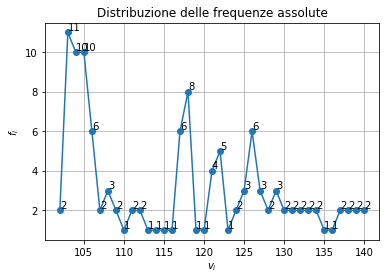

In [12]:
fig, ax = plt.subplots()
ax.plot(v_x, f_x, '-o')
ax.set_title('Distribuzione delle frequenze assolute')
ax.set_xlabel(r'$v_i$')
ax.set_ylabel(r'$f_i$')
ax.grid()

for i, v_i in enumerate(v_x):
    ax.text(v_i, f_x[i], f'{f_x[i]:.0f}', ha='left', va='bottom')

plt.show()

## Istogramma

In [13]:
def plot_histogram_classe(ampiezza_classe):
    min_value = x[0]
    max_value = x[n - 1]

    fig, ax = plt.subplots()
    values, bins, bars = ax.hist(x, bins=list(range(min_value, max_value + ampiezza_classe, ampiezza_classe)), edgecolor='black', linewidth=1.5)

    ax.set_xticks(bins)
    ax.bar_label(bars)
    ax.set_title(f'Distribuzione delle frequenze assolute con classe di ampiezza {ampiezza_classe}')
    ax.set_xlabel(r'$v_i$')
    ax.set_ylabel(r'$f_i$')

    plt.show()

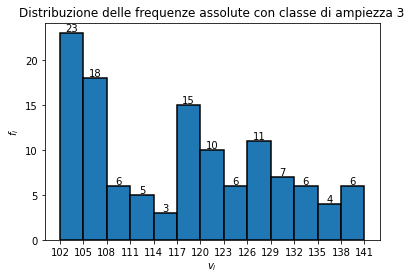

In [14]:
plot_histogram_classe(3)

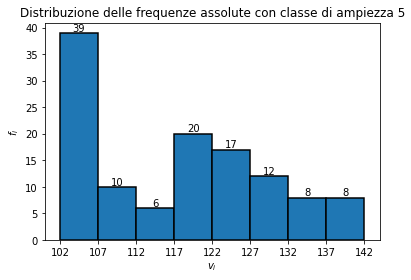

In [15]:
plot_histogram_classe(5)

# Indici di posizione

## Calcolo della media campionaria

L'indice della media campionare su tutto il campione è poco significativo in questo campione perché, come si nota dal grafico dal peso corporeo nel tempo, il peso sempre sceso e quindi i valori sono cambiati spesso. La media campionaria invece indicherebbe che si è avuto una media di peso corporeo per ogni settimana di 117 kg, cosa non vera.

In [16]:
x_mean = 0
for x_i in x:
    x_mean += x_i
x_mean = x_mean / n

print(f'Media campionaria: {x_mean}')

Media campionaria: 116.975


## Calcolo della media pesata

In [17]:
x_mean_pesata = 0
for i in range(k_x):
    x_mean_pesata += (f_x[i] / n) * v_x[i]

print(f'Media pesata: {x_mean_pesata}')

Media pesata: 116.97500000000002


## Calcolo della mediana campionaria

Anche la mediana campionaria per la tipologia del dato, è poco signficativa.

In [18]:
if n % 2 == 0:
    x_mediana = (x[n // 2] + x[n // 2 - 1]) / 2
else:
    x_mediana = x[n // 2]

print(f'Mediana campionaria: {x_mediana}')

Mediana campionaria: 117.0


## Calcolo della moda campionaria

La moda campionaria è molto utile, in quanto come detto precedentemente, si riesce a determinare in quali fasi del peso corporeo si è avuto più difficoltà. Calcolando più mode campionarie, escludendo ogni volta quella precedente, si riesce a capire quali sono le fasi del peso corporeo in cui si è avuto più difficoltà.

In [19]:
max_f_x = 0
index = 0
count = 0

for i, f_i in enumerate(f_x):
    if f_i > max_f_x:
        max_f_x = f_i
        count = 1
        index = i
    elif f_i == max_f_x:
        count += 1

x_moda = v_x[index]
if count == 1:
    print(f'Moda campionaria unimodale: v_{index + 1} = {x_moda}, f_{index + 1} = {max_f_x}')
elif count == 2:
    print(f'Moda campionaria bimodale: v_{index + 1} = {x_moda}, f_{index + 1} = {max_f_x}')
else:
    print(f'Moda campionaria multimodale: v_{index + 1} = {x_moda}, f_{index + 1} = {max_f_x}')

Moda campionaria unimodale: v_2 = 103, f_2 = 11


# Indici di variabilità

## Calcolo della varianza campionaria

La varianza dei dati rispetto alla media campionaria è un po' alta.

In [20]:
s2_x = 0
for x_i in x:
    s2_x += (x_i - x_mean) ** 2

s2_x = s2_x / (n - 1)
print(f'Varianza campionaria: {s2_x}')

Varianza campionaria: 133.5539915966387


## Calcolo della deviazione standard campionaria

In [21]:
s_x = sqrt(s2_x)
print(f'Deviazione standard campionaria: {s_x}')

Deviazione standard campionaria: 11.556556216998155


## Calcolo dello scarto medio assoluto

In [22]:
sa_x = 0
for x_i in x:
    sa_x += abs(x_i - x_mean)

sa_x = sa_x / n
print(f'Scarto medio assoluto: {sa_x}')

Scarto medio assoluto: 10.010416666666668


## Calcolo dell'ampiezza del campo di variazione

Questo dato indica anche il massimo di chili persi in tutto il periodo.

In [23]:
w_x = x[n - 1] - x[0]
print(f'Ampiezza del campo di variazione: {w_x}')

Ampiezza del campo di variazione: 38


## Calcolo del coefficiente di variazione

In [24]:
cv_x = s_x / x_mean
print(f'Coefficiente di variazione: {cv_x}')

Coefficiente di variazione: 0.09879509482366451


# Indici di forma

## Calcolo dell'indice di simmetria

Dall'istogramma si nota una coda a destra, infatti l'indice è positivo.

In [25]:
g_x = 0
for x_i in x:
    g_x += (x_i - x_mean) ** 3

g_x = g_x / n
g_x = g_x / (s_x ** 3)

if g_x < 0:
    print(f'Indice di simmetria: {g_x}, asimmetria negativa')
else:
    print(f'Indice di simmetria: {g_x}, asimmetria positiva')

Indice di simmetria: 0.30646667980571396, asimmetria positiva


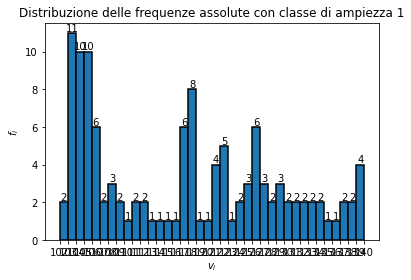

In [26]:
plot_histogram_classe(1)

## Calcolo dell'indice di curtosi

In [27]:
curtosi_x = 0
for x_i in x:
    curtosi_x += (x_i - x_mean) ** 4

curtosi_x = curtosi_x / n
curtosi_x = curtosi_x / (s_x ** 4)
curtosi_x = curtosi_x - 3

if curtosi_x > 0:
    print(f'Indice di curtosi: {curtosi_x}, è presente un eccesso di dati nelle classi centrali')
elif curtosi_x < 0:
    print(f'Indice di curtosi: {curtosi_x}, è presente una carenza di dati nelle classi centrali')
else:
    print(f'Indice di curtosi: {curtosi_x}, è presente una distribuzione di dati come quella di una distribuzione normale')

Indice di curtosi: -1.1994033519694862, è presente una carenza di dati nelle classi centrali


# Quartili

## Calcolo dei quartili

In [28]:
def get_quartile(k):
    np = n * (k / 100)
    if np % 1 == 0:
        return (x[int(np)] + x[int(np) - 1]) / 2
    else:
        return x[int(np)]

In [29]:
Q1_x = get_quartile(25)
Q2_x = get_quartile(50)
Q3_x = get_quartile(75)

print(f'Principali quartili: Q1 = {Q1_x}, Q2 = {Q2_x}, Q3 = {Q3_x}')

Principali quartili: Q1 = 105.0, Q2 = 117.0, Q3 = 126.0


## Calcolo dello scarto interquartile

Indica la lunghezza del rettangolo nel box plot

In [30]:
si_x = Q3_x - Q1_x
print(f'Scarto interquartile: {si_x}')

Scarto interquartile: 21.0


## Box plot

Come si evince dal grafico, non vi sono outliers. Se essi fosse presenti, sarebbero indicati nel grafico come dei punti rossi. Il segmento arancione rappresenta la media campionaria.

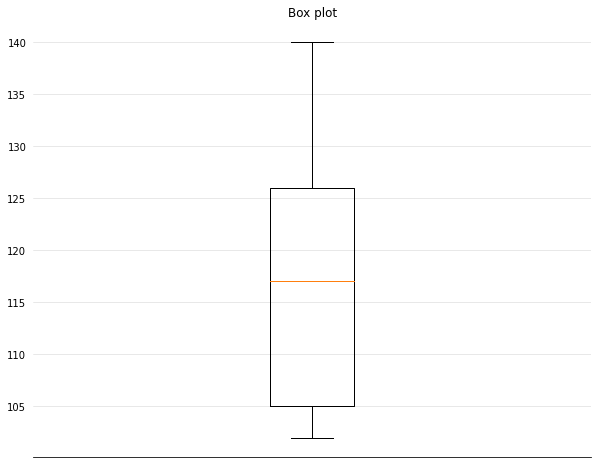

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(x, flierprops=dict(marker='s', markerfacecolor='red'))
ax.set_title('Box plot')
ax.yaxis.set_ticks_position('none')
ax.grid(axis='y', linestyle='-', linewidth=0.5, color='lightgrey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
plt.show()

# Intervalli di previsione

Gli intervalli di previsione non sono quelli tipici di una distribuzione normale, ma questo lo si poteva già evincere dall'istogramma delle classi di ampiezza 1.

In [32]:
intervallo1_x = (x_mean - s_x, x_mean + s_x)
intervallo2_x = (x_mean - 2 * s_x, x_mean + 2 * s_x)
intervallo3_x = (x_mean - 3 * s_x, x_mean + 3 * s_x)

count1 = 0
count2 = 0
count3 = 0
for x_i in x:
    if intervallo1_x[0] < x_i < intervallo1_x[1]:
        count1 += 1
    if intervallo2_x[0] < x_i < intervallo2_x[1]:
        count2 += 1
    if intervallo3_x[0] < x_i < intervallo3_x[1]:
        count3 += 1

print(f'Intervalli di previsione:\n{intervallo1_x} {(count1 / n) * 100:.2f}%\n{intervallo2_x} {(count2 / n) * 100:.2f}%\n{intervallo3_x} {(count3 / n) * 100:.2f}%')

Intervalli di previsione:
(105.41844378300183, 128.53155621699815) 53.33%
(93.86188756600369, 140.08811243399632) 100.00%
(82.30533134900553, 151.64466865099445) 100.00%


# Parsing dei dati delle calorie assunte

In [33]:
with open('calorie.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    calorie = []
    reader.__next__()
    reader.__next__()
    for row in reader:
        calorie.append([row[0], float(row[8])])

df_calorie = pd.DataFrame(calorie, columns=['data', 'calorie'])
df_calorie['data'] = pd.to_datetime(df_calorie['data'])
df_calorie = df_calorie.groupby(pd.Grouper(key='data', freq='D')).sum().round(0)
df_calorie = df_calorie.reset_index()
df_calorie = df_calorie.groupby(pd.Grouper(key='data', freq='W')).mean().round(0)
df_calorie = df_calorie.reset_index()
print(f'Numero di ampiezza dei dati prima della eliminazione delle settimane in cui non vi sono state pesate corporee: {len(df_calorie)}')
df_calorie

Numero di ampiezza dei dati prima della eliminazione delle settimane in cui non vi sono state pesate corporee: 142


,data,calorie
0,2019-10-20,2374.0
1,2019-10-27,1768.0
2,2019-11-03,1291.0
3,2019-11-10,1875.0
4,2019-11-17,1702.0
...,...,...
137,2022-06-05,1808.0
138,2022-06-12,1718.0
139,2022-06-19,1784.0
140,2022-06-26,1960.0


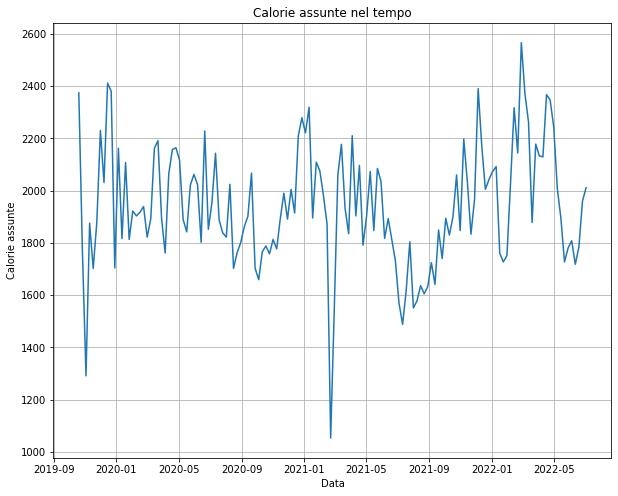

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df_calorie['data'], df_calorie['calorie'])
ax.set_title('Calorie assunte nel tempo')
ax.set_xlabel('Data')
ax.set_ylabel('Calorie assunte')
ax.grid()
plt.show()

In [35]:
df_merge = pd.merge(df_peso, df_calorie, on='data', how='inner')
df_merge = df_merge.dropna()
df_merge = df_merge.reset_index()

print(f'Numero di ampiezza dei dati dopo l\'eliminazione delle settimane in cui non vi sono state pesate corporee: {len(df_merge)}')
df_merge

Numero di ampiezza dei dati dopo l'eliminazione delle settimane in cui non vi sono state pesate corporee: 120


,index,data,peso,calorie
0,0,2019-12-29,140.0,1704.0
1,1,2020-01-12,140.0,1816.0
2,2,2020-01-26,139.0,1813.0
3,3,2020-02-02,139.0,1922.0
4,4,2020-02-23,138.0,1939.0
...,...,...,...,...
115,115,2022-06-05,103.0,1808.0
116,116,2022-06-12,103.0,1718.0
117,117,2022-06-19,102.0,1784.0
118,118,2022-06-26,106.0,1960.0


# Dati bidimensionali

## Calcolo dei coefficienti di correlazione campionario

In [36]:
n = len(df_merge)
peso_mean = df_merge['peso'].mean()
calorie_mean = df_merge['calorie'].mean()
s_peso = df_merge['peso'].std()
s_calorie = df_merge['calorie'].std()

r = 0
for i in range(n):
    r += (df_merge['peso'][i] - peso_mean) * (df_merge['calorie'][i] - calorie_mean)
r = r / ((n - 1) * s_peso * s_calorie)

if r > 0:
    print(f'Coefficiente di correlazione campionario: {r}, è presente una correlazione positiva')
elif r < 0:
    print(f'Coefficiente di correlazione campionario: {r}, è presente una correlazione negativa')
else:
    print(f'Coefficiente di correlazione campionario: {r}, è presente una correlazione nulla')

Coefficiente di correlazione campionario: -0.07911156081428679, è presente una correlazione negativa


## Diagramma a dispersione (scatter plot)

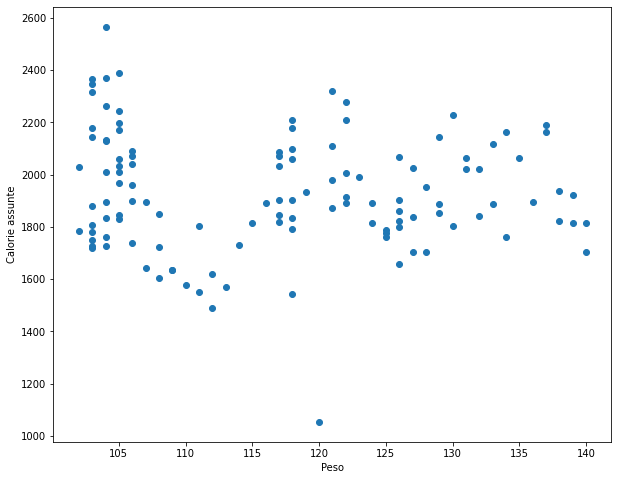

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df_merge['peso'], df_merge['calorie'])
ax.set_xlabel('Peso')
ax.set_ylabel('Calorie assunte')

plt.show()

Quello che emerge dalla correlazione negativa tra il peso e le calorie è che quando il peso era alto vi era un minore consumo di calorie. Al diminuire del peso, le calorie assunte sono aumentate. In effetti nella realtà questo accadde e quindi si può trovare una delle cause della non diminuzione del peso. Tuttavia, le variabili sono molte, come ad esempio una maggiore attività fisica che ha portato allo sviluppo di massa muscolare e quindi alla contribuzione della non diminuzione del peso in generale.

Con i dati da Samsung Health si potrebbero fare molti altri studi, come ad esempio quanto ha influito l'attività fisica sul peso, come è cambiato il battito cardiaco e la pressione sanguigna (la pressione scese di molto), ecc. Con l'incrocio dei dati si potrebbero fare tante cose interessanti.